In [2]:
from Envs.pendulum import PendulumEnv
import gymnasium as gym
from gymnasium.wrappers import TimeLimit

In [3]:
env = PendulumEnv()
env = TimeLimit(env, max_episode_steps=200) 

In [3]:
from sb3_contrib import TRPO

In [4]:
TRPO_model = TRPO("MlpPolicy", env=env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
TRPO_model.learn(200000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -208     |
| time/              |          |
|    fps             | 521      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -272     |
| time/                     |          |
|    fps                    | 496      |
|    iterations             | 2        |
|    time_elapsed           | 8        |
|    total_timesteps        | 4096     |
| train/                    |          |
|    explained_variance     | 0.912    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00737  |
|    learning_rate          | 0.001    |
|    n_updates              | 50       |
|    policy_objective       | 0.0233   |
|   

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -273     |
| time/                     |          |
|    fps                    | 419      |
|    iterations             | 13       |
|    time_elapsed           | 63       |
|    total_timesteps        | 26624    |
| train/                    |          |
|    explained_variance     | 0.939    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00935  |
|    learning_rate          | 0.001    |
|    n_updates              | 61       |
|    policy_objective       | 0.0346   |
|    std                    | 0.673    |
|    value_loss             | 37.1     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -279     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -252     |
| time/                     |          |
|    fps                    | 387      |
|    iterations             | 24       |
|    time_elapsed           | 126      |
|    total_timesteps        | 49152    |
| train/                    |          |
|    explained_variance     | 0.958    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00587  |
|    learning_rate          | 0.001    |
|    n_updates              | 72       |
|    policy_objective       | 0.0173   |
|    std                    | 0.645    |
|    value_loss             | 36.9     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -245     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -175     |
| time/                     |          |
|    fps                    | 373      |
|    iterations             | 35       |
|    time_elapsed           | 192      |
|    total_timesteps        | 71680    |
| train/                    |          |
|    explained_variance     | 0.98     |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00763  |
|    learning_rate          | 0.001    |
|    n_updates              | 83       |
|    policy_objective       | 0.0305   |
|    std                    | 0.627    |
|    value_loss             | 26.5     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -174     |
| time/                     |          |
|    fps        

----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -193     |
| time/                     |          |
|    fps                    | 367      |
|    iterations             | 46       |
|    time_elapsed           | 256      |
|    total_timesteps        | 94208    |
| train/                    |          |
|    explained_variance     | 0.989    |
|    is_line_search_success | 1        |
|    kl_divergence_loss     | 0.00776  |
|    learning_rate          | 0.001    |
|    n_updates              | 94       |
|    policy_objective       | 0.0241   |
|    std                    | 0.556    |
|    value_loss             | 3.04     |
----------------------------------------
----------------------------------------
| rollout/                  |          |
|    ep_len_mean            | 200      |
|    ep_rew_mean            | -196     |
| time/                     |          |
|    fps        

In [11]:
TRPO_model.save("models/TRPO_200k")

In [2]:
from Envs.pendulum import PendulumEnv
import gymnasium as gym
from gymnasium.wrappers import TimeLimit

env = PendulumEnv()
env = TimeLimit(env, max_episode_steps=200) 

In [3]:
from sb3_contrib import TRPO
TRPO_model = TRPO.load("models/TRPO_200k.zip", env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [4]:
from sb3_contrib import TRPO
from Client_diff_Dropout import FRLClient
from Agent import SB3Agent
import copy
from stable_baselines3.common.evaluation import evaluate_policy
import torch

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
train_log = {}
test_log = {}

In [7]:
timesteps_real_per_round = 500
timesteps_fc_per_round = timesteps_real_per_round * 30
epoch_per_round = 100
CLIENTS_NUM = 10
rounds_num = 20
batch_size_env_model = 128

env_models = []

Global_RL = TRPO_model

env_theta = [0.1, 0.3, 0.5, 0.7, 0.9]
real_envs = []
Clients = []
for i in range(CLIENTS_NUM):
    real_envs.append( TimeLimit(PendulumEnv(), max_episode_steps=200) )
    policy_net = Global_RL
    agent = SB3Agent(policy_net)
    client = FRLClient(real_envs[i], agent, lr = 3e-4, hidden_size = 256, , device = device)
    Clients.append(client)
    env_model = copy.deepcopy(client.model)
    env_models.append(env_model)

    
train_loss_list = []
test_avg_list = []

for client_idx in range(len(Clients)):
    print('------------------------------')
    print("client: " + str(client_idx))
    # update policy
    # train prediction models
    Clients[client_idx].learn(timesteps_real_per_round, epoch_per_round, batch_size_env_model)
     #
    train_loss_list.append(Clients[client_idx].train_loss_list)
    test_avg_list.append(Clients[client_idx].test_avg_list)
    

------------------------------
client: 0
Avg loss: 0.022469268907249595!
Avg loss: 0.02201218389440328!
Avg loss: 0.020863805954577402!
Avg loss: 0.018805323121875214!
Avg loss: 0.017478213264112127!
Avg loss: 0.016921680474479218!
Avg loss: 0.015788111532941306!
Avg loss: 0.014556285906486058!
Avg loss: 0.013967487468423011!
Avg loss: 0.013448650405237761!
Avg loss: 0.01289946476337112!
Avg loss: 0.012209106972829129!
Avg loss: 0.01165127457100122!
Avg loss: 0.011351803226571065!
Avg loss: 0.011110841711439813!
Avg loss: 0.011020693797909188!
Avg loss: 0.010894850747912035!
Avg loss: 0.010721825405683678!
Avg loss: 0.010563053950900212!
Avg loss: 0.010347932522709016!
Avg loss: 0.010031531000180016!
Avg loss: 0.009826586348741936!
Avg loss: 0.009547082551192337!
Avg loss: 0.009234050403271491!
Avg loss: 0.009016287742900506!
Avg loss: 0.008873844523429094!
Avg loss: 0.008754694152836843!
Avg loss: 0.008649061224520362!
Avg loss: 0.008584323293568256!
Avg loss: 0.008532118361035828!
Av

Avg loss: 0.007578924103096748!
Avg loss: 0.007561934398642431!
Avg loss: 0.007478613794858878!
Avg loss: 0.007368421303884437!
Avg loss: 0.007308746637233222!
Avg loss: 0.007229734611852715!
Avg loss: 0.007133989693053688!
Avg loss: 0.007072440641544138!
Avg loss: 0.007023770271140772!
Avg loss: 0.00693766422821985!
Avg loss: 0.006922941386389236!
Avg loss: 0.006878469340736046!
Avg loss: 0.0068524225777946415!
Avg loss: 0.006836724401412842!
Avg loss: 0.0068371218116953965!
Avg loss: 0.00685606842879982!
Avg loss: 0.0068863518411914505!
Avg loss: 0.00686025637279575!
Avg loss: 0.006859443018911406!
Avg loss: 0.0068379730498418214!
Avg loss: 0.006879749914320807!
Avg loss: 0.0069192577646269154!
Avg loss: 0.0069422450424948086!
Avg loss: 0.006991029612448377!
------------------------------
client: 4
Avg loss: 0.017614352041564415!
Avg loss: 0.018929221576739413!
Avg loss: 0.01872673620392258!
Avg loss: 0.0165679762888855!
Avg loss: 0.014949331730119107!
Avg loss: 0.014349333033654451!

Avg loss: 0.010842229068863769!
Avg loss: 0.01051959333100361!
Avg loss: 0.010229336536613119!
Avg loss: 0.010068099319784475!
Avg loss: 0.009990520089874432!
Avg loss: 0.009790903623482639!
Avg loss: 0.009455374769628785!
Avg loss: 0.00912632392844292!
Avg loss: 0.008958716175851198!
Avg loss: 0.00889004673242501!
Avg loss: 0.008912845339570291!
Avg loss: 0.008865817923785168!
Avg loss: 0.008749322124980002!
Avg loss: 0.008586969985068815!
Avg loss: 0.008333033277134139!
Avg loss: 0.00810081656408632!
Avg loss: 0.008089057103158362!
Avg loss: 0.008163558458181796!
Avg loss: 0.008379411129571962!
Avg loss: 0.008494332871438625!
Avg loss: 0.008490386531775584!
Avg loss: 0.008674699783247586!
Avg loss: 0.0087245960063107!
Avg loss: 0.008571053098906607!
Avg loss: 0.008377239448018372!
Avg loss: 0.008058850334006516!
Avg loss: 0.0076794176869831665!
Avg loss: 0.0072777750697180935!
Avg loss: 0.006975126529675133!
Avg loss: 0.006772089622390922!
Avg loss: 0.006556603985663969!
Avg loss: 0.

In [10]:
train_log["Droput"] = train_loss_list

In [11]:
train_log["Droput"]

[[0.0796382598002524,
  0.0572470675908392,
  0.059868148541382185,
  0.058853451365386174,
  0.048217550048172304,
  0.04944240192970779,
  0.04521475685360097,
  0.04184090988683837,
  0.0388406586851978,
  0.039875135039190164,
  0.03534503652578097,
  0.03354495029394811,
  0.03537317538329728,
  0.03192451416933775,
  0.03234397989289467,
  0.023782265562041098,
  0.027432150690466763,
  0.027965860585428583,
  0.02923224033803858,
  0.0311071305698515,
  0.025594771420716558,
  0.020898430941781204,
  0.02505527116507719,
  0.02739421105316512,
  0.02353651749028859,
  0.022059008521815086,
  0.019931193067556124,
  0.021458601883284342,
  0.02058717753620749,
  0.02188623771284918,
  0.02366658268138809,
  0.01574068834583534,
  0.020644972864058093,
  0.018700345881005755,
  0.018071157542887253,
  0.01719268311060602,
  0.01856653225797637,
  0.020718375044770775,
  0.017823540720352127,
  0.018034067741437763,
  0.017675121397548555,
  0.018020003777861938,
  0.01553623655805

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves_and_statistics(loss_list):
    """
    绘制loss曲线和统计信息图像。

    参数:
    loss_list (list of list of float): 每个元素是一个模型在每个epoch的loss列表。
    """
    # 绘制每个模型的loss曲线
    plt.figure(figsize=(10, 6))
    for idx, loss in enumerate(loss_list):
        plt.plot(loss, label=f'Model {idx+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 计算每个模型最后一个epoch的loss值
    last_epoch_losses = [loss[-1] for loss in loss_list]

    # 计算最后一个epoch的平均值和方差
    mean_last_epoch_loss = np.mean(last_epoch_losses)
    std_last_epoch_loss = np.std(last_epoch_losses)

    # 绘制最后一个epoch的loss值，平均值和方差
    plt.figure(figsize=(10, 6))
    plt.plot(last_epoch_losses, 'o-', label='Last Epoch Loss')
    plt.axhline(mean_last_epoch_loss, color='r', linestyle='--', label=f'Mean: {mean_last_epoch_loss:.2f}')
    plt.fill_between(range(len(last_epoch_losses)), mean_last_epoch_loss - std_last_epoch_loss, mean_last_epoch_loss + std_last_epoch_loss, color='r', alpha=0.2, label=f'Std Dev: {std_last_epoch_loss:.2f}')
    plt.xlabel('Model Index')
    plt.ylabel('Loss')
    plt.title('Last Epoch Losses with Mean and Std Dev')
    plt.legend()
    plt.grid(True)
    plt.show()


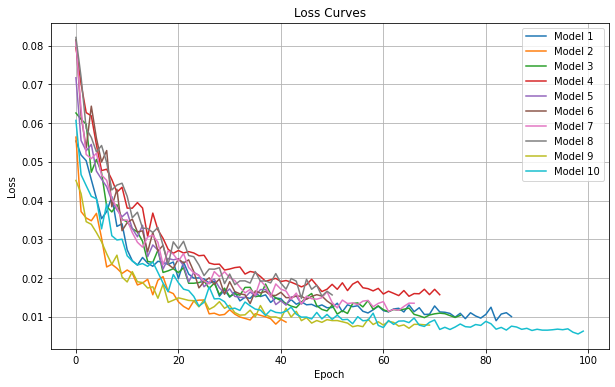

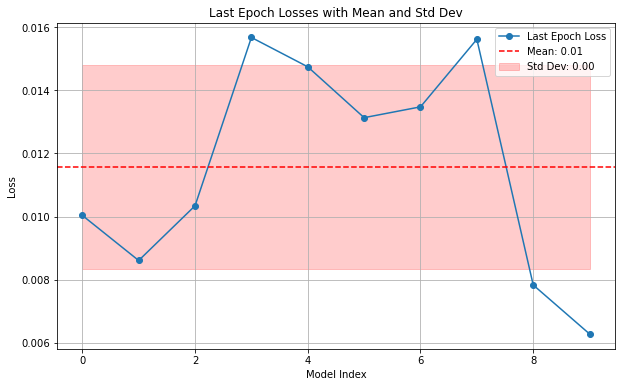

In [13]:
plot_loss_curves_and_statistics(train_loss_list)

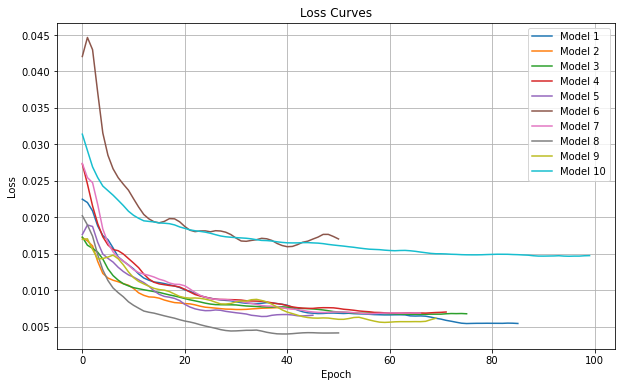

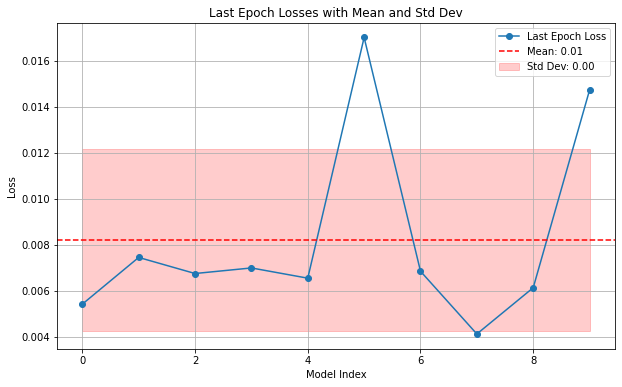

In [14]:
plot_loss_curves_and_statistics(test_avg_list)